In [1]:
import numpy as nm 
import matplotlib.pyplot as mtp 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
data_set = pd.read_csv("datasets/Mall_Customers.csv")


In [3]:
X = data_set.iloc[:,[2,3]].values
y = data_set.iloc[:,4].values


In [4]:
print(X.shape, y.shape)

(250, 2) (250,)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=0)

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

In [6]:
classifier = KNeighborsClassifier(n_neighbors=2,metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


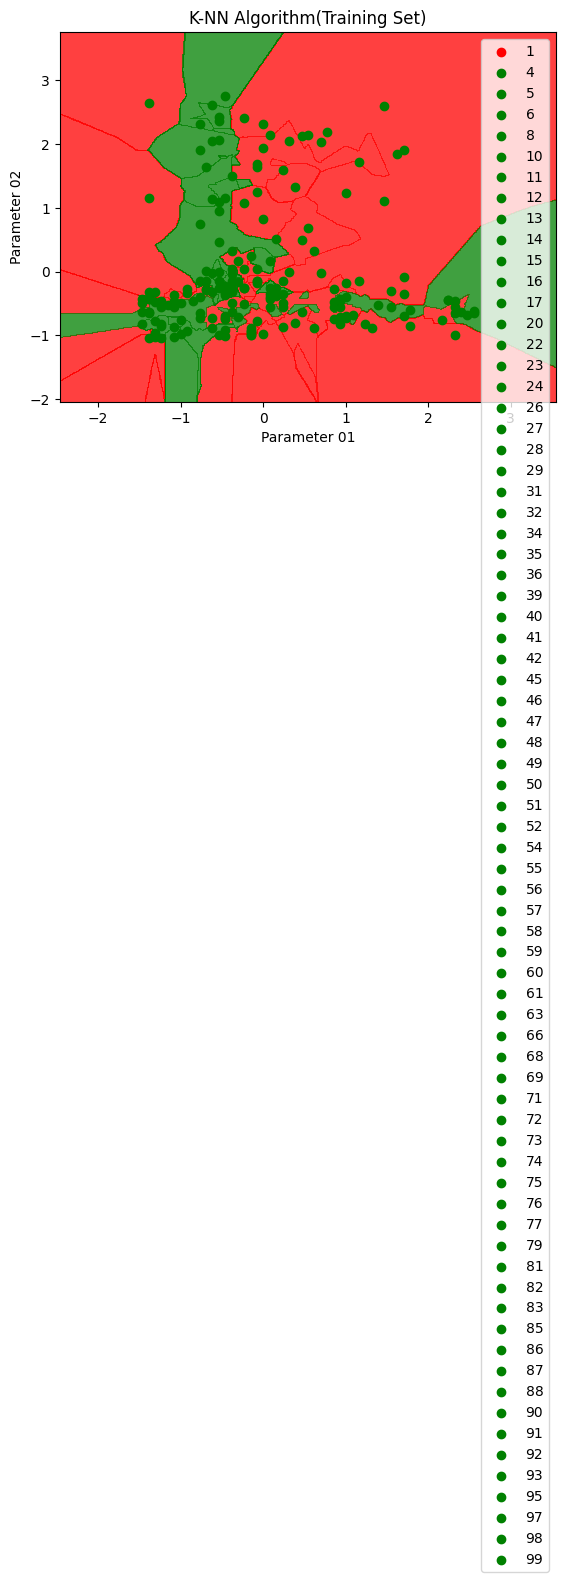

In [9]:
X_set, y_set = X_train, y_train
x1,x2 = nm.meshgrid(nm.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max() + 1,step=0.01),
nm.arange(start=X_set[:,1].min()-1,stop = X_set[:,1].max() + 1,step=0.01))

mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75,cmap = ListedColormap(('red','green')))

mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())
for i,j in enumerate(nm.unique(y_set)):
    mtp.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
color = ListedColormap(('red','green'))(i),label = j)
mtp.title("K-NN Algorithm(Training Set)")
mtp.xlabel("Parameter 01")
mtp.ylabel("Parameter 02")
mtp.legend()
mtp.show()   

In [10]:
x_set,y_set = X_test,y_test
x1,x2 = nm.meshgrid(nm.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max() + 1,step = 0.01),
nm.arange(start= x_set[:,1].min() - 1,stop= x_set[:,0].max()+1,step=0.01))

mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap = ListedColormap(('blue','yellow')))
mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())

for i,j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j,0],x_set[y_set == j,1], color = ListedColormap(('blue','yellow'))(i),label = j)

mtp.title("K-NN Algorithm (Test set)")
mtp.xlabel("Parameter 01")
mtp.ylabel("Parameter 02")
mtp.legend()
mtp.show()